In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#importing dataset
dataset = pd.read_csv('RK_12-13.csv')
df = pd.DataFrame(dataset)

In [3]:
#populating zero greendrive values 
df['greenDriveValue'].fillna(value=0, inplace = True)
df['greenDriveType'].fillna(value=0, inplace = True)

In [4]:
#adding ha, hb,hc columns
df['HA']= df['greenDriveValue']*0
df['HB']= df['greenDriveValue']*0
df['HC']= df['greenDriveValue']*0

In [5]:
#populating ha,hb,hc
for index, row in df.iterrows():
    if df.loc[index,'greenDriveType'] == 3:
        df.loc[index,'HC'] = df.loc[index,'greenDriveValue']
    if df.loc[index,'greenDriveType'] == 2:
        df.loc[index,'HB'] = df.loc[index,'greenDriveValue']
    if df.loc[index,'greenDriveType'] == 1:
        df.loc[index,'HA'] = df.loc[index,'greenDriveValue']

In [6]:
#populating os
for index, row in df.iterrows():
    if df.loc[index,'speed'] >= 35:
        df.loc[index,'OS'] = (df.loc[index,'speed']*2 - 70)*50/35
    else:
        df.loc[index,'OS'] = 0


In [7]:
#converting time to minutes
import datetime

for index, row in df.iterrows():
    #if df.loc[index,'speed'] >= 50:
     df.loc[index,'Time'] =datetime.datetime.fromtimestamp(df.loc[index, 'timestamp']).strftime('%H:%M:%S')

df['Time'].str.split(':').head()
df['Time']= df['Time'].str.split(':').apply(lambda x: (int(x[0]) * 3600 + int(x[1])*60 + int(x[2]))/60)

In [8]:
#getting acceleration
for index, row in df.iterrows():
    df.loc[index,'acc'] = 0
for index, row in df.iterrows():
     if(df.iloc[index-1, 51] - df.iloc[index, 51]) != 0:
         df.iloc[index,52] =(int)(df.iloc[index-1, 2] - df.iloc[index, 2])/(df.iloc[index-1, 51] - df.iloc[index, 51])

In [9]:
# v*a
for index, row in df.iterrows():
    df.loc[index,'v*a']= df.loc[index,'acc']*df.loc[index,'speed']

In [10]:
#scaling all parameters
df['HA']= (df['HA']-np.mean(df['HA']))/np.std(df['HA'])
df['HB']= (df['HB']-np.mean(df['HB']))/np.std(df['HB'])
df['HC']= (df['HC']-np.mean(df['HC']))/np.std(df['HC'])
df['OS']= (df['OS']-np.mean(df['OS']))/np.std(df['OS'])
df['v*a']= (df['v*a']-np.mean(df['v*a']))/np.std(df['v*a'])

In [11]:
#importing imp columns in a fresh df
df1 = df[['v*a','HA','HB','HC','OS']]

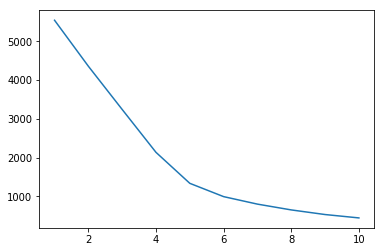

In [12]:
#determine number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++')
    kmeans.fit(df1)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.show()

In [13]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5)

In [14]:
kmeans.fit(df1[['HA','HB','HC','OS','v*a']])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [15]:
a = kmeans.labels_

In [16]:
ans = pd.Series(data = a)

In [17]:
df1['Behavior']= ans

C:\Users\Hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [18]:
   df1.to_excel('Driver_Behavior.xlsx', sheet_name = 'sheet1')